In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [198]:
users=pd.read_csv("ml-100k/u.user",sep='|',names=u_cols)
ratings = pd.read_csv('ml-100k/u.data',sep='\t', names=r_cols)
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5))
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [4]:
movielens.describe()

C:\Users\Shreyas\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,user_id,age,movie_id,rating,timestamp,video_release_date
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN


In [5]:
movielens.shape

(100000, 12)

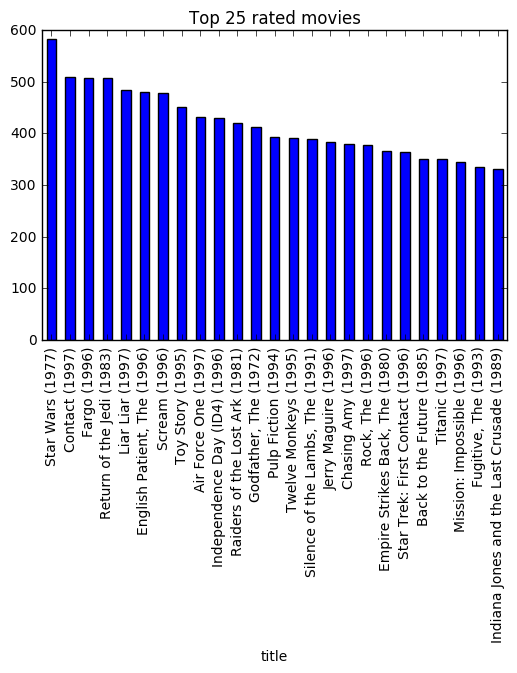

In [199]:
##top 25 rated movies
most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.plot(kind="bar",title="Top 25 rated movies",label="count")

In [7]:
movie_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()
#as we could see that the mean through size of 1 is 5.0 that means that if one person rated it as 5 it would consider and give us
#to avoid inaccuracy of top rating we would set parameter as 100 size

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

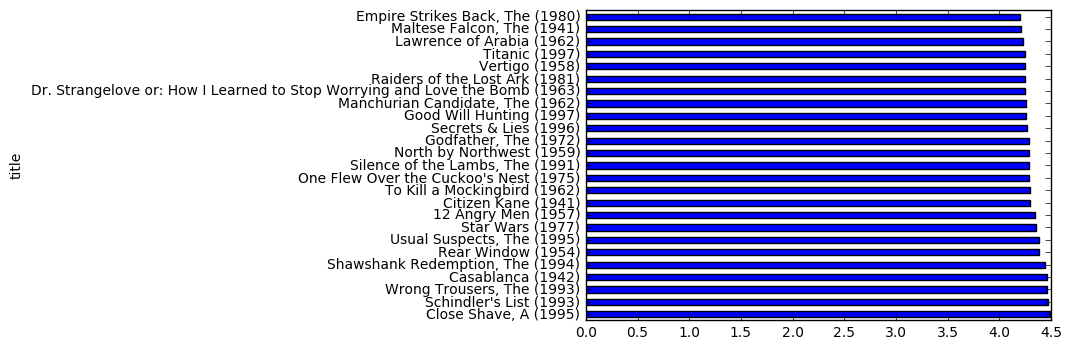

In [8]:
most100=movie_stat['rating']['size'] >= 100
most_rated_mean=movie_stat[most100].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:25].plot(kind="barh")

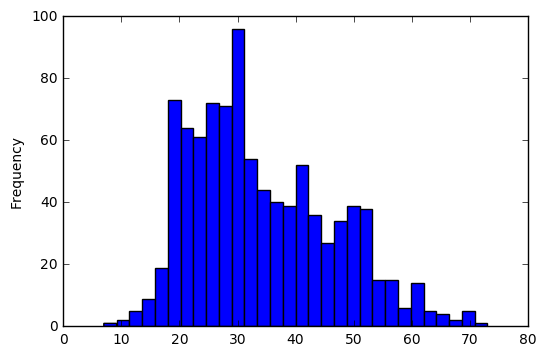

In [9]:
users.age.plot.hist(bins=30)
plt.xlabel=("Age")
plt.ylabel=("count")
plt.title=("Age distribution")

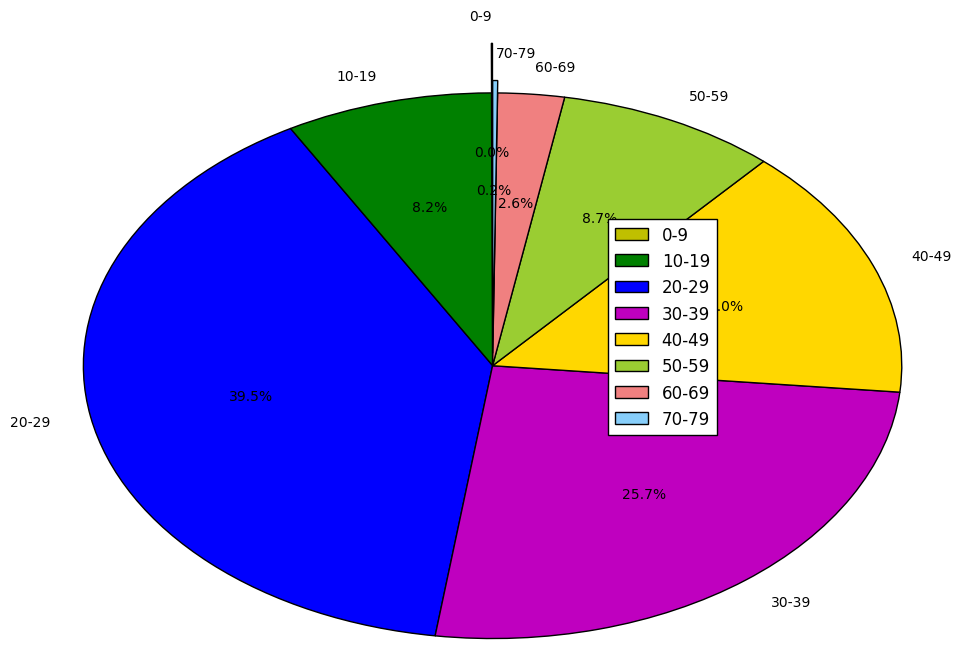

In [10]:
labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
movielens['age_group'] = pd.cut(movielens.age, range(0, 81, 10), right=False, labels=labels)
distage=movielens.groupby('age_group').agg({'rating':[np.size,np.mean]})
colors=["y","g","b","m",'gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(distage['rating']['size'],startangle=90,labels=labels,colors=colors,explode=(0.4,0,0,0,0,0,0,0.1),autopct = '%1.1f%%',radius=2.2)
plt.legend()
plt.show()

In [80]:
toystory=movielens[movielens.movie_id==1]
toystory.shape
mov1 = movielens.sort_values("movie_id",ascending=True).head(452) ##we have 452 reviews approximately for Toystory
mov1.set_index('movie_id',inplace=True)
by_age = mov1.loc[mov1.index].groupby(['title', 'age_group']).agg([np.size,np.mean])
by_age

user_id                age            rating  \
                              size        mean   size       mean   size   
title            age_group                                                
Toy Story (1995) 10-19       16724  510.729730  16724  17.000000  16724   
                 20-29       85428  508.132275  85428  24.888889  85428   
                 30-39       54692  464.487603  54692  33.809917  54692   
                 40-49       31640  433.028571  31640  44.528571  31640   
                 50-59       13108  380.482759  13108  52.689655  13108   
                 60-69        2260  471.800000   2260  61.000000   2260   
                 70-79         452  767.000000    452  70.000000    452   

                                     timestamp            video_release_date  \
                                mean      size       mean               size   
title            age_group                                                     
Toy Story (1995) 10-19      3.621622     16724  883173781            16724.0   
                 20-29      3.920635     85428  882419115            85428.0   
                 30-39      4.033058     54692  882197765            54692.0   
                 40-49      3.700000     31640  884105186            31640.0   
                 50-59      3.758621     13108  883482885            13108.0   
                 60-69      3.400000      2260  885523819             2260.0   
                 70-79      5.000000       452  891462829              452.0   

                                 
                           mean  
title            age_group       
Toy Story (1995) 10-19      NaN  
                 20-29      NaN  
                 30-39      NaN  
                 40-49      NaN  
                 50-59      NaN  
                 60-69      NaN  
                 70-79      NaN

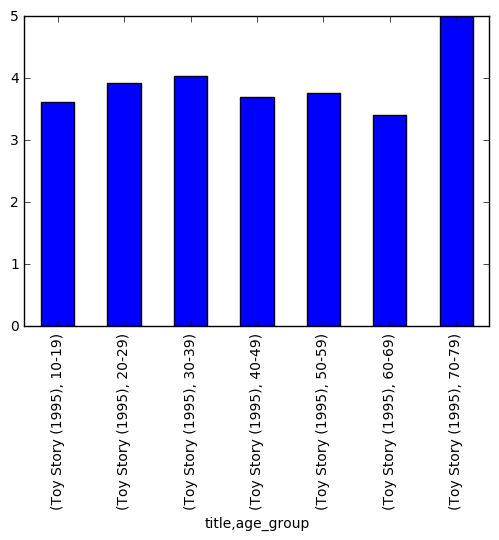

In [81]:
by_age['rating']['mean'].plot(kind="bar")
##as we could see below age 70-79 gave higher ratings for toystory

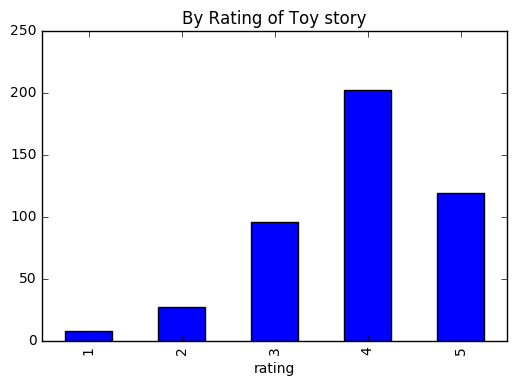

In [97]:
#oystory=toystory.groupby('rating').agg([np.size,np.mean])
toystory['user_id']['size'].plot(kind="bar",title="By Rating of Toy story")

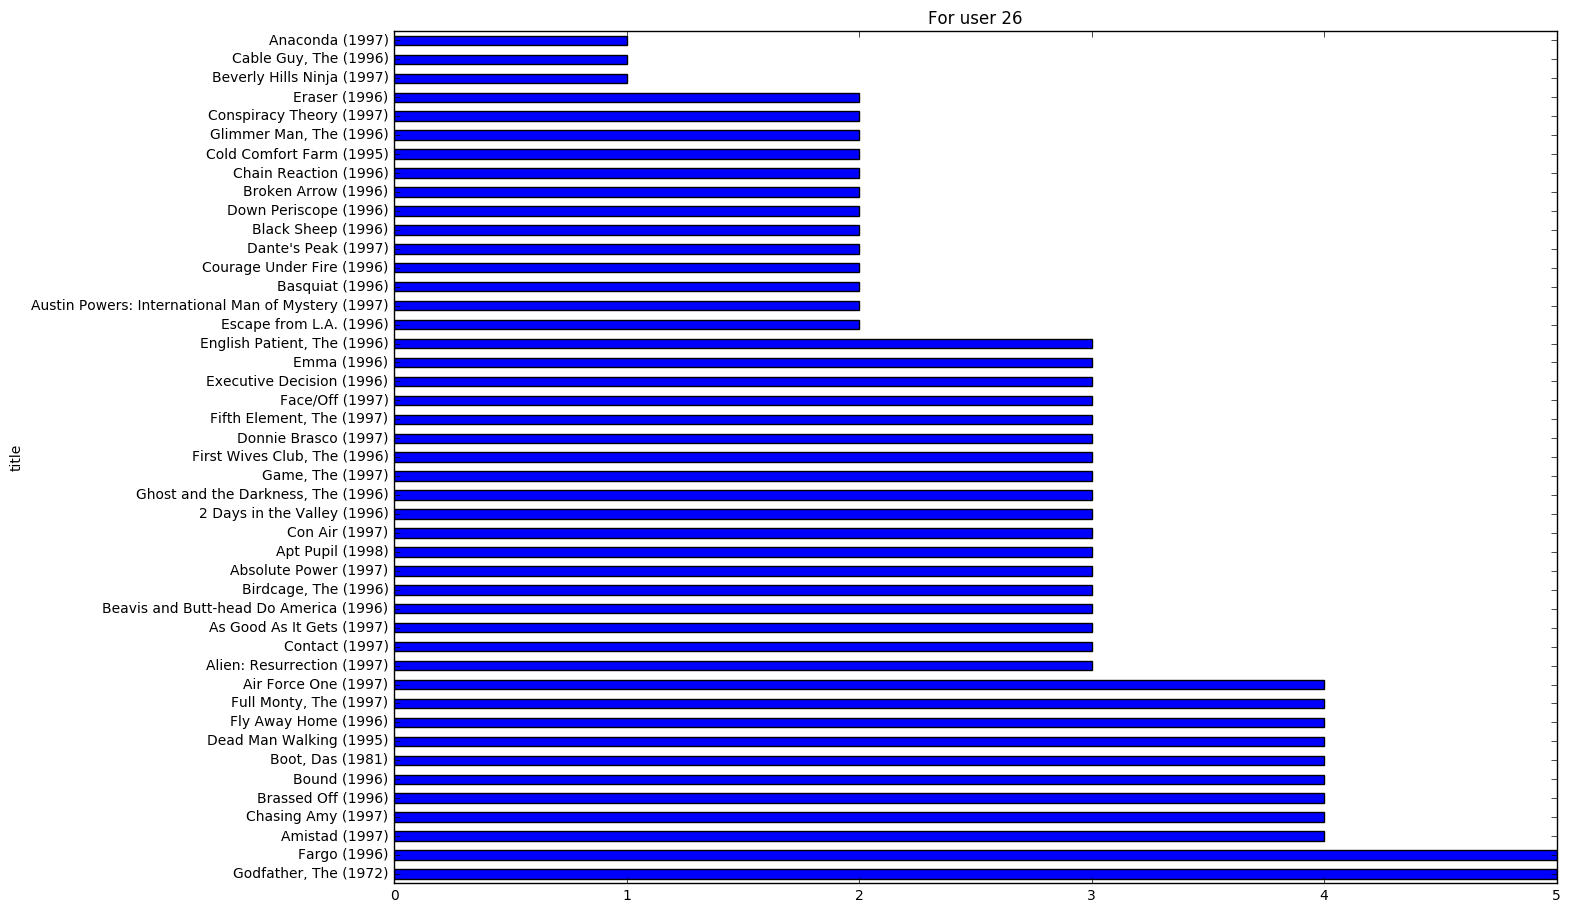

In [83]:
user1=movielens[movielens.user_id==26]
user1=user1.groupby('title').agg([np.size,np.mean])
user1['rating']['mean'][:45].sort_values(ascending=False).plot(kind="barh",figsize=(15,11),title="For user 26",label="Movie Name")

In [98]:
##additional comparision of males vs females
movielens.reset_index('movie_id', inplace=True)
pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [99]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [100]:
pivoted.reset_index('movie_id', inplace=True)

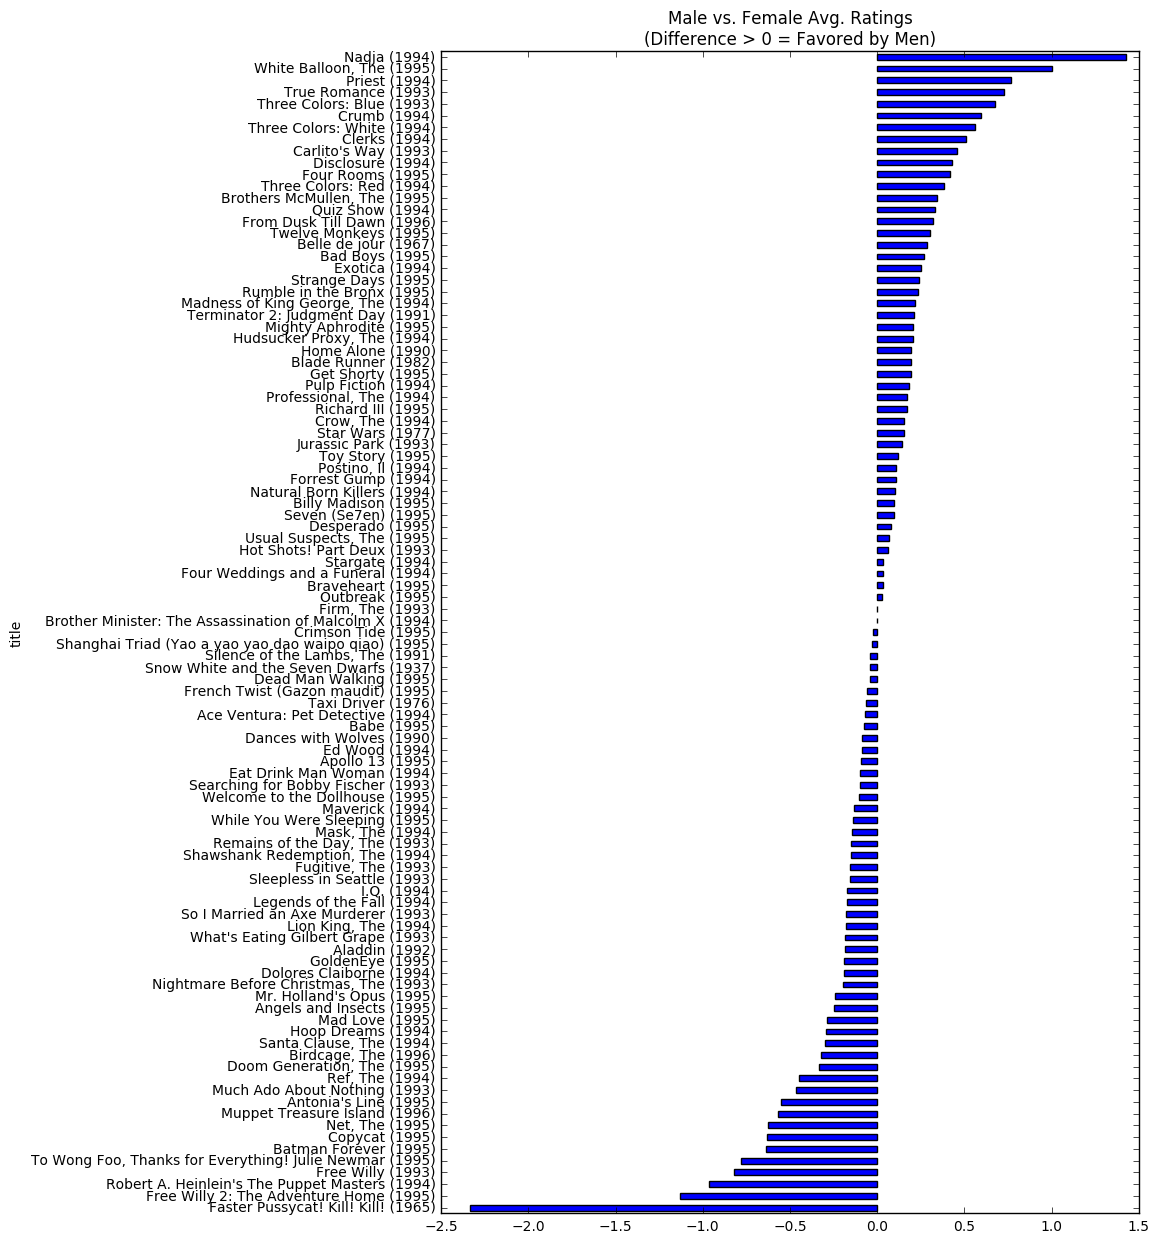

In [106]:
disagreements = pivoted[pivoted.movie_id.isin(movielens.head(100).index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15],title=("Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)"))

In [127]:
mlmovie=movielens.drop(['user_id','zip_code'],axis=1)
mlmovie=mlmovie.drop(['index','sex','timestamp','title','release_date','video_release_date','imdb_url','age_group'],axis=1)
mlmovie.head()

,age,occupation,movie_id,rating
0,24,technician,61,4
1,47,educator,61,4
2,35,other,61,4
3,27,programmer,61,5
4,49,educator,61,4


In [143]:
mlmovie=mlmovie[:500]
tgt = mlmovie[['rating']]
print tgt.shape
others=mlmovie[['movie_id','age','occupation']]
print others.shape
##converting the occupation into digits for linear regression , here we are going to make the machine predict ratings in accordance to 
##movie_id , age
others["occupation"]=others.occupation.replace(['technician', 'educator', 'other', 'programmer', 'healthcare',
       'student', 'artist', 'scientist', 'writer', 'engineer',
       'administrator', 'doctor', 'retired', 'librarian', 'entertainment',
       'executive', 'lawyer', 'none', 'marketing', 'salesman'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

others.head()


(500, 1)
(500, 3)


C:\Users\Shreyas\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,movie_id,age,occupation
0,61,24,1
1,61,47,2
2,61,35,3
3,61,27,4
4,61,49,2


In [144]:
from sklearn.cross_validation import train_test_split
for i in range(4):
    print ((train_test_split(others,tgt,random_state=1))[i]).shape
    
x_train,x_test,y_train,y_test=train_test_split(others,tgt,random_state=1)


(375, 3)
(125, 3)
(375, 1)
(125, 1)


In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
print lreg.get_params()
print lreg.coef_
print lreg.intercept_

{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
[[ 0.00207221 -0.00373644 -0.02078028]]
[ 3.73071206]


In [153]:
y_pred=lreg.predict(x_test)
y_pred[:15]

array([[ 3.48424982],
       [ 3.58021862],
       [ 3.65023341],
       [ 3.73802451],
       [ 3.79787227],
       [ 3.91344273],
       [ 3.55825971],
       [ 3.68478082],
       [ 3.86659136],
       [ 3.80082508],
       [ 3.53630081],
       [ 3.29755119],
       [ 3.93835445],
       [ 3.72307875],
       [ 3.38408485]])

In [155]:
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.04491812336


In [161]:
print metrics.regression.r2_score(y_test,y_pred)
##here we can see our model is not accurate as age , occupation and movieid cannot predict the rating of the movie, the model is 0.4% accurate

0.00430623638889


In [169]:
#To build a recomendation model,using machine learning 
movies_df = pd.read_csv('movies.csv')
movie_df=movies_df

In [170]:
movies_df = pd.concat([movies_df, movies_df.genres.str.get_dummies(sep='|')], axis=1)  
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
##Using Collabrative Filtering
movies_cateogary = movies_df.columns[3:]
movies_df.loc[0]

movieId                                                         1
title                                            Toy Story (1995)
genres                Adventure|Animation|Children|Comedy|Fantasy
(no genres listed)                                              0
Action                                                          0
Adventure                                                       1
Animation                                                       1
Children                                                        1
Comedy                                                          1
Crime                                                           0
Documentary                                                     0
Drama                                                           0
Fantasy                                                         1
Film-Noir                                                       0
Horror                                                          0
IMAX      

In [172]:
from collections import OrderedDict
##Manually using preferences for some user , we can change it according to our needs 
user_preferences = OrderedDict(zip(movies_cateogary, []))

user_preferences['Action'] = 5  
user_preferences['Adventure'] = 5  
user_preferences['Animation'] = 1  
user_preferences["Children's"] = 2  
user_preferences["Comedy"] = 3  
user_preferences['Crime'] = 2  
user_preferences['Documentary'] = 1  
user_preferences['Drama'] = 1  
user_preferences['Fantasy'] = 1  
user_preferences['Film-Noir'] = 1  
user_preferences['Horror'] = 2  
user_preferences['Musical'] = 1  
user_preferences['Mystery'] = 3  
user_preferences['Romance'] = 1  
user_preferences['Sci-Fi'] = 5  
user_preferences['War'] = 3  
user_preferences['Thriller'] = 2  
user_preferences['Western'] =1 

In [173]:
def dot_product(vector1,vector2):
    return sum([ i*j for i,j in zip(vector1, vector2)])

In [174]:
def movie_score(movie_features,user_preferences):
    return dot_product(movie_features, user_preferences)

In [175]:
toy_Story_features=movies_df.loc[0][3:]
toy_Story_features

(no genres listed)    0
Action                0
Adventure             1
Animation             1
Children              1
Comedy                1
Crime                 0
Documentary           0
Drama                 0
Fantasy               1
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
Name: 0, dtype: object

In [176]:
toy_story_user_predicted_score = dot_product(toy_Story_features, user_preferences.values())  
toy_story_user_predicted_score

9

In [177]:
movies_df[movies_df.title.str.contains('Eternal Sunshine')]

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5127,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [180]:
eternal=movies_df.loc[5127][3:]
eternal

(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 1
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               1
Sci-Fi                1
Thriller              0
War                   0
Western               0
Name: 5127, dtype: object

In [181]:
eternal_user_predicted_score = dot_product(eternal, user_preferences.values())  
eternal_user_predicted_score 

6

In [182]:
def get_movie_recommendations(user_preferences, n_recommendations):  
    #we add a column to the movies_df dataset with the calculated score for each movie for the given user
    movies_df['score'] = movies_df[movies_cateogary].apply(movie_score, 
                                                           args=([user_preferences.values()]), axis=1)
    return movies_df.sort_values(by=['score'], ascending=False)['title'][:n_recommendations]

get_movie_recommendations(user_preferences, 10)  

7648                                        Rubber (2010)
5845    Patlabor: The Movie (Kidô keisatsu patorebâ: T...
6678    Aqua Teen Hunger Force Colon Movie Film for Th...
7575                                     Inception (2010)
7760                               Mars Needs Moms (2011)
7004                                      Watchmen (2009)
7660                                      Megamind (2010)
8871                                  Tomorrowland (2015)
5371    Lupin III: The Castle Of Cagliostro (Rupan san...
7072                   Madagascar: Escape 2 Africa (2008)
Name: title, dtype: object

In [183]:
##Collabrative Filtering now 
ratings_df=pd.read_csv('ratings.csv')

In [184]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [185]:
ratings_df.drop('timestamp',axis=1)
ratings_df = pd.merge(ratings_df, movie_df, on='movieId')
ratings_df.head()
ratings_df.drop('timestamp',axis=1)

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama
5,39,31,3.0,Dangerous Minds (1995),Drama
6,73,31,3.5,Dangerous Minds (1995),Drama
7,88,31,3.0,Dangerous Minds (1995),Drama
8,96,31,2.5,Dangerous Minds (1995),Drama
9,110,31,4.0,Dangerous Minds (1995),Drama


In [186]:
ratings_mtx_df = ratings_df.pivot_table(values='rating', index='userId', columns='title')  
ratings_mtx_df.fillna(0, inplace=True)

movie_index = ratings_mtx_df.columns

ratings_mtx_df.head() 

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
corr_matrix = np.corrcoef(ratings_mtx_df.T)  
corr_matrix.shape 

(9064L, 9064L)

In [192]:
favoured_movie_title = 'Fight Club (1999)'

favoured_movie_index = list(movie_index).index(favoured_movie_title)

P = corr_matrix[favoured_movie_index]


#only return those movies with a high correlation with Toy Story
list(movie_index[(P>0.4) & (P<1.0)])  

['American Beauty (1999)',
 'American History X (1998)',
 'Batman Begins (2005)',
 'Donnie Darko (2001)',
 'Eternal Sunshine of the Spotless Mind (2004)',
 'Gladiator (2000)',
 'Kill Bill: Vol. 1 (2003)',
 'Kill Bill: Vol. 2 (2004)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Matrix, The (1999)',
 'Memento (2000)',
 'Office Space (1999)',
 'Sin City (2005)',
 'Snatch (2000)']

In [193]:
def get_movie_similarity(movie_title):  
    '''Returns correlation vector for a movie'''
    movie_idx = list(movie_index).index(movie_title)
    return corr_matrix[movie_idx]

def get_movie_recommendations(user_movies):  
    '''given a set of movies, it returns all the movies sorted by their correlation with the user'''
    movie_similarities = np.zeros(corr_matrix.shape[0])
    for movie_id in user_movies:
        movie_similarities = movie_similarities + get_movie_similarity(movie_id)
    similarities_df = pd.DataFrame({
        'movie_title': movie_index,
        'sum_similarity': movie_similarities
        })
    similarities_df = similarities_df[~(similarities_df.movie_title.isin(user_movies))]
    similarities_df = similarities_df.sort_values(by=['sum_similarity'], ascending=False)
    return similarities_df

In [195]:
sample_user = 24
ratings_df[ratings_df.userId==sample_user].sort_values(by=['rating'], ascending=False) 

,userId,movieId,rating,timestamp,title,genres
41945,24,6,5.0,849321588,Heat (1995),Action|Crime|Thriller
3664,24,296,5.0,849282414,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4490,24,356,4.0,849282540,Forrest Gump (1994),Comedy|Drama|Romance|War
5823,24,457,4.0,849282507,"Fugitive, The (1993)",Thriller
72196,24,1161,4.0,849321826,"Tin Drum, The (Blechtrommel, Die) (1979)",Drama|War
8179,24,590,4.0,849282414,Dances with Wolves (1990),Adventure|Drama|Western
70105,24,81,4.0,849321769,Things to Do in Denver When You're Dead (1995),Crime|Drama|Romance
44280,24,648,4.0,849321569,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
13724,24,380,4.0,849282414,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
2445,24,165,4.0,849282506,Die Hard: With a Vengeance (1995),Action|Crime|Thriller


In [197]:
sample_user_movies = ratings_df[ratings_df.userId==sample_user].title.tolist()  
recommendations = get_movie_recommendations(sample_user_movies)

#We get the top 20 recommended movies
recommendations.movie_title.head(20)

7397                                         Speed (1994)
5941                                      Outbreak (1995)
6309                                  Pretty Woman (1990)
4307                                 Jurassic Park (1993)
1675                      Clear and Present Danger (1994)
2817                                     Firm, The (1993)
6705                                     Rock, The (1996)
8663                                    Waterworld (1995)
5409                                Mrs. Doubtfire (1993)
755                                 Batman Forever (1995)
1681                                   Cliffhanger (1993)
3267                                     GoldenEye (1995)
1206                                    Braveheart (1995)
7009                          Seven (a.k.a. Se7en) (1995)
3156                                         Ghost (1990)
7856                    Terminator 2: Judgment Day (1991)
187                     Ace Ventura: Pet Detective (1994)
4086    Interv